# **Black Friday Sale Predictions**

*Reference:*
*   https://www.kaggle.com/code/cerolacia/blackfridaysalesprediction/notebook (For Data Preparation)
*   https://www.kaggle.com/code/harshjain123/black-friday-sales-data-analysis (Not yet)
*



## Setting

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
FOLDER_PATH = r'/content/drive/MyDrive/MachineLearning-DANDL-20212/'
TRAIN_DATA_PATH = FOLDER_PATH + r'data/train.csv'
TEST_DATA_PATH = FOLDER_PATH + r'data/test.csv'

### Sanity Check

In [5]:
import os
os.listdir(FOLDER_PATH)

['README.txt', 'src', 'data']

In [6]:
os.path.exists(FOLDER_PATH), os.path.exists(TRAIN_DATA_PATH), os.path.exists(TEST_DATA_PATH)

(True, True, True)

### Magic Functions

In [7]:
%matplotlib inline

## Necessary Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm
from scipy import stats
from scipy.stats import norm

## Data Preprocessing

### Raw Data

In [9]:
train_raw = pd.read_csv(TRAIN_DATA_PATH)
test_raw = pd.read_csv(TEST_DATA_PATH)

### QD's Simple EDA

In [ ]:
## Copy from raw train and raw test
df_train = train_raw.copy()
df_test = test_raw.copy()

In [ ]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [ ]:
df_train_clean = df_train[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
# df_train_clean = df_train_clean.astype({"User_ID": object})
df_train_clean.info()
# df_train_clean = pd.get_dummies(df_train_clean)
df_test_clean = df_test[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']]
# df_test_clean = pd.get_dummies(df_test_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 33.6+ MB


In [ ]:
df_test_clean.shape
df_train_clean.shape

(550068, 8)

In [ ]:
check_point = df_train.shape[0]
check_point

550068

In [ ]:
Y_train = df_train['Purchase']
Y_train.shape

(550068,)

In [ ]:
df = pd.concat([df_train_clean, df_test_clean])

In [ ]:
arr = pd.factorize(df['Product_ID'])[0] + 1

In [ ]:
df['Product_ID'] = arr

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     783667 non-null  int64 
 1   Product_ID                  783667 non-null  int64 
 2   Gender                      783667 non-null  object
 3   Age                         783667 non-null  object
 4   Occupation                  783667 non-null  int64 
 5   City_Category               783667 non-null  object
 6   Stay_In_Current_City_Years  783667 non-null  object
 7   Marital_Status              783667 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 53.8+ MB


In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Age', 'Occupation' , 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status'])

In [ ]:
df.shape

(783667, 42)

In [ ]:
X_train = df.iloc[:check_point, :]
X_test = df.iloc[check_point:, :]

In [ ]:
X_train.shape

(550068, 42)

In [ ]:
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state =0)

In [ ]:
X_train_1.shape, X_val.shape

((385047, 42), (165021, 42))

### [1] EDA

In [11]:
df_train = train_raw.copy()
df_test = test_raw.copy()

In [12]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [14]:
m = df_train["Gender"].value_counts()
m

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
age = df_train["Age"].value_counts()
age

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [16]:
age.index

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

In [17]:
## WHY WE NEED TO DO THAT WHEN WE HAVE THE ABOVE?

fig = px.bar(age, y=age, x=age.index, color =age.index, template='ggplot2')
fig.update_layout(
    xaxis_title= 'Age',
    yaxis_title="Count",
    legend_title='Age',
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
fig.show()

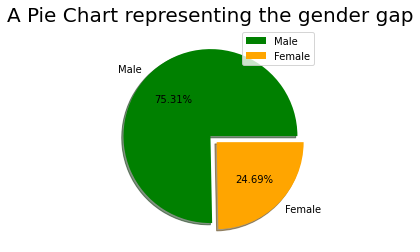

In [18]:
## WHY WE NEED TO DO THAT ?

labels = ['Male', 'Female']
colors = ['Green', 'Orange']
explode = [0, 0.1]

plt.pie(m, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()



In [19]:
## Nominal Data, why do we need to care about mean ??????????

df_train[['Product_Category_1', 'Product_Category_2','Product_Category_3']].groupby(df_train['Gender']).mean()

,Product_Category_1,Product_Category_2,Product_Category_3
Gender,,,
F,5.717714,10.009166,12.453556
M,5.301512,9.788729,12.730699


In [20]:
## Why
df_train[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].groupby(df_train['User_ID']).count()

,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,,,
1000001,35,21,14
1000002,77,54,26
1000003,29,23,13
1000004,14,12,9
1000005,106,58,16
...,...,...,...
1006036,514,319,110
1006037,122,74,33
1006038,12,9,3


In [21]:
## Who by the most product
df_train['Product_ID'].groupby(df_train['User_ID']).count().sort_values(ascending = False)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: Product_ID, Length: 5891, dtype: int64

In [22]:
## TOP 5 PRODUCT
df_train['Product_ID'].value_counts()[:5]

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64

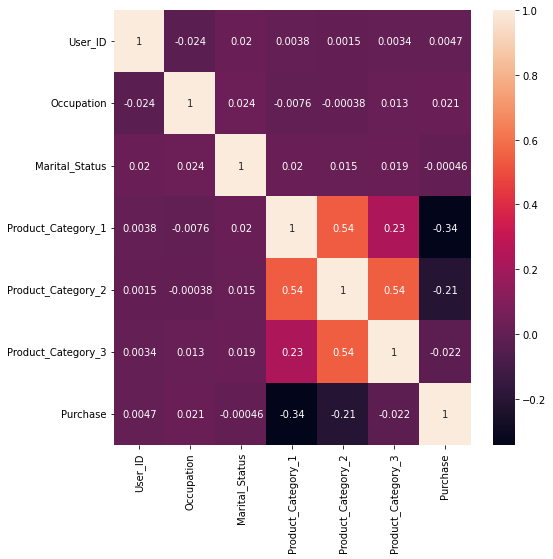

In [23]:
## What do we figure out ?
fig, ax = plt.subplots(figsize= (8, 8))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

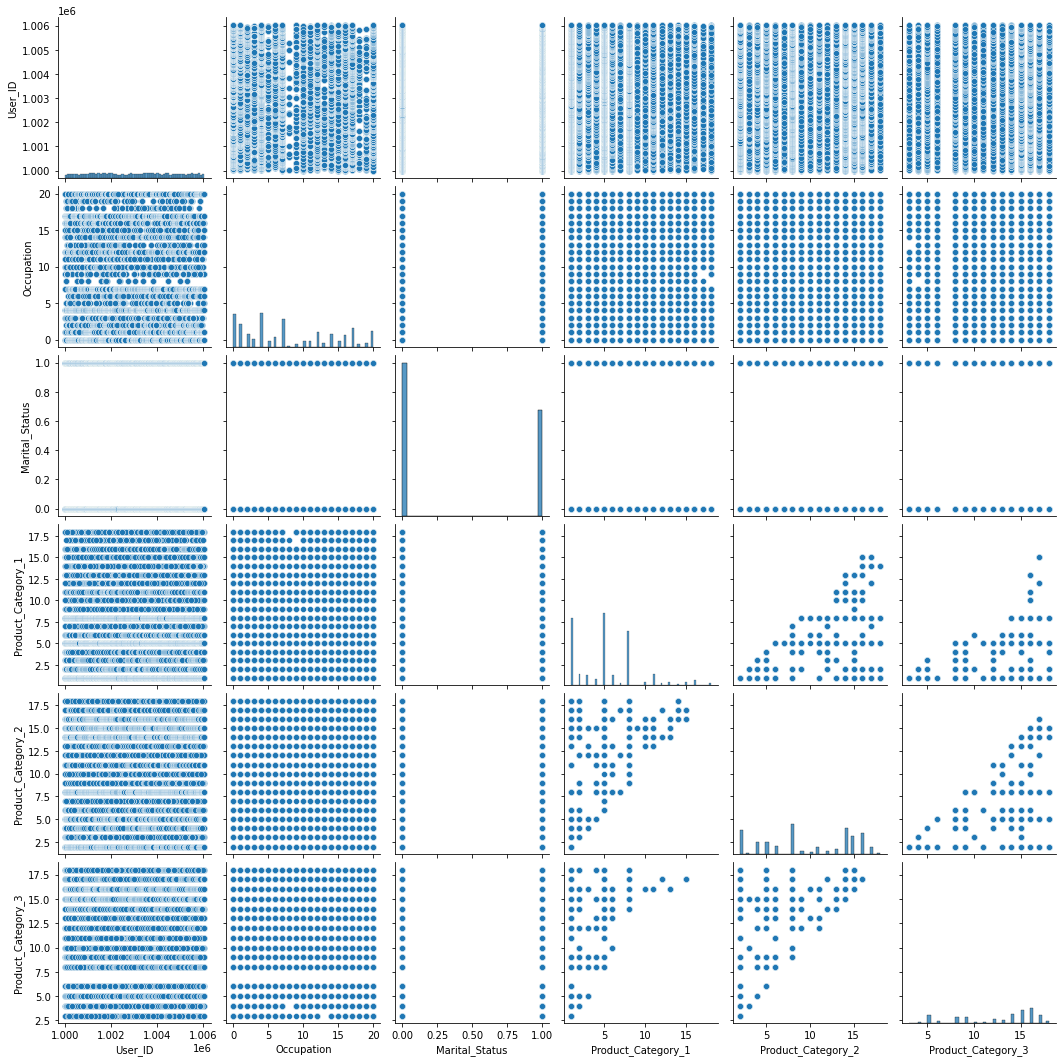

In [24]:
sns.pairplot(df_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


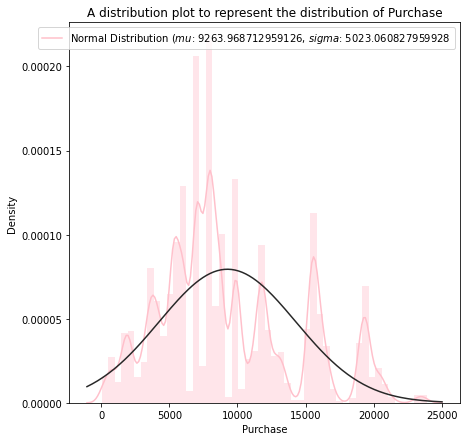

In [25]:
## Distribution of the target attribute
plt.rcParams['figure.figsize'] = (7,7)
sns.distplot(df_train['Purchase'], color = 'pink', fit = norm)
mu, sigma = norm.fit(df_train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))
plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

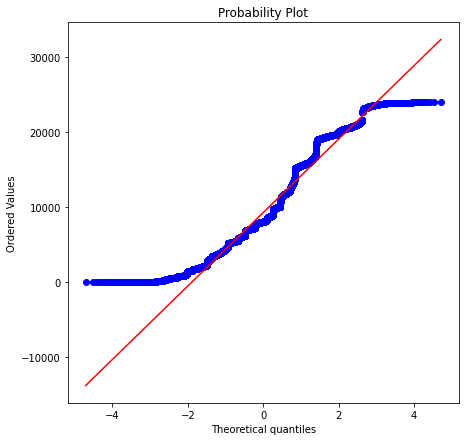

In [26]:
## Normal check 
stats.probplot(df_train['Purchase'], plot = plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



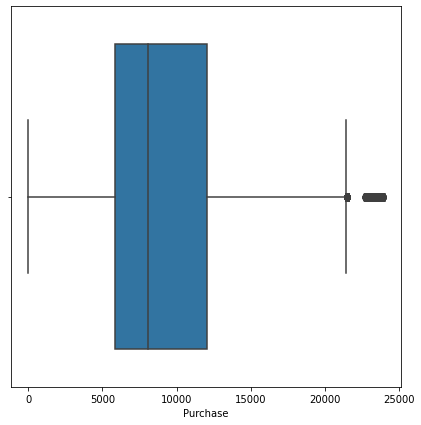

In [27]:
sns.boxplot(df_train['Purchase'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



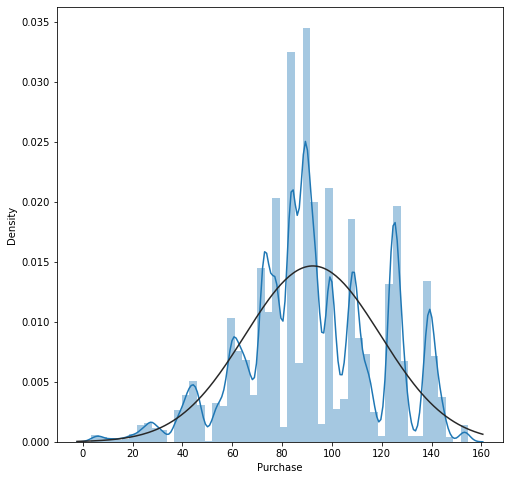

In [28]:
ax, fig = plt.subplots(figsize = (8, 8))
sns.distplot(np.sqrt(df_train['Purchase']), fit = norm)

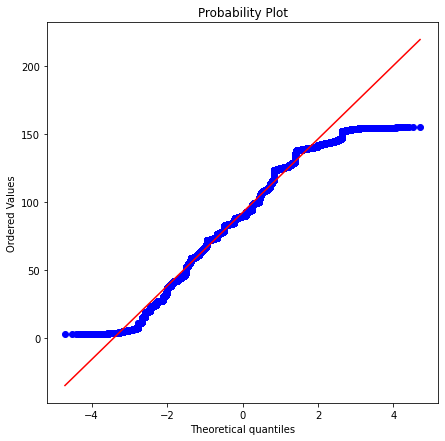

In [29]:
stats.probplot(np.sqrt(df_train['Purchase']), plot = plt)
plt.show()

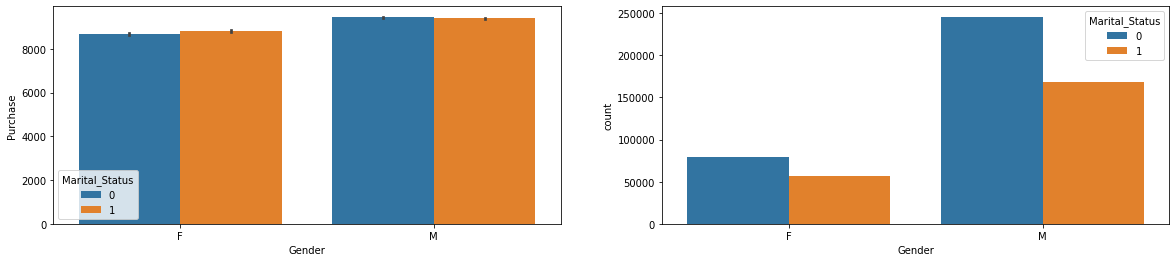

In [30]:
## Dependency
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Gender",y="Purchase",hue="Marital_Status",estimator=np.mean,data=df_train,ax=ax[0])
sns.countplot(x="Gender",hue="Marital_Status",data=df_train,ax=ax[1])

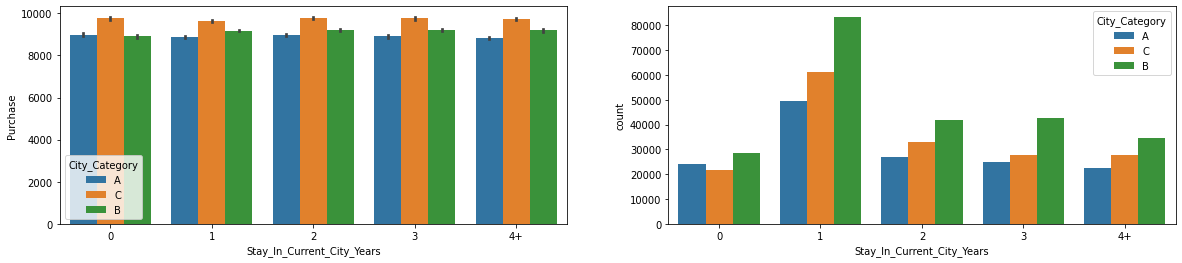

In [31]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",hue="City_Category",order=["0","1","2","3","4+"],estimator=np.mean,data=df_train,ax=ax[0])
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",order=["0","1","2","3","4+"],data=df_train,ax=ax[1])


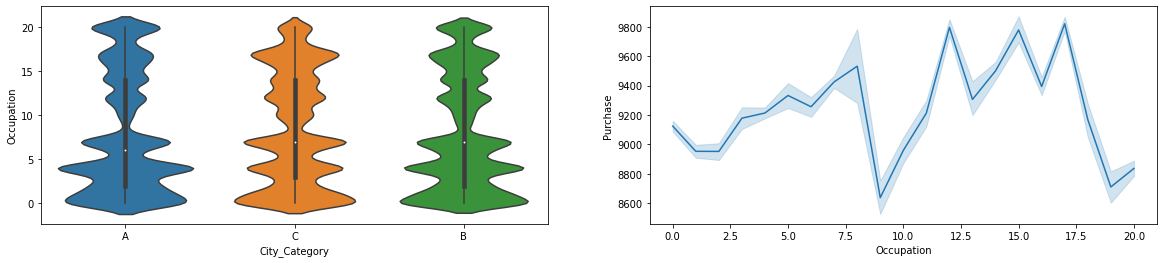

In [32]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="City_Category",y="Occupation",data=df_train,ax=ax[0])
sns.lineplot(x="Occupation",y="Purchase",data=df_train,ax=ax[1])

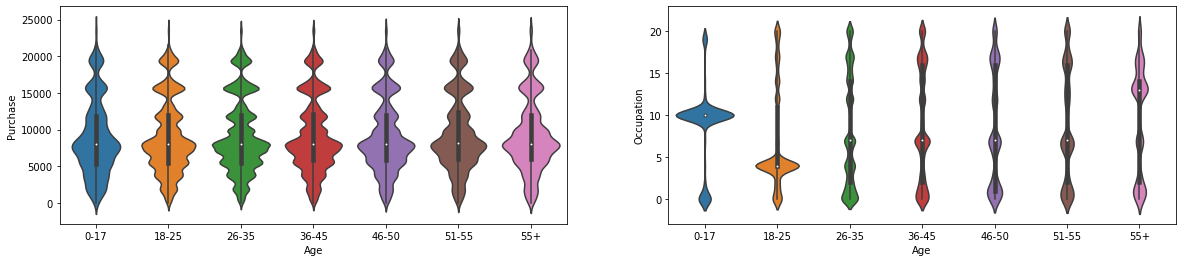

In [33]:
fig,ax = plt.subplots(figsize=(20,4),ncols=2,nrows=1)
sns.violinplot(x="Age",y="Purchase",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=df_train,ax=ax[0])
sns.violinplot(x="Age",y="Occupation",order=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],data=df_train,ax=ax[1])


#### Filling Missing Value

In [34]:
## Why mean ?
## Fill Product_Category_2 in 2
df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mean(), inplace=True)

In [35]:
df_train['Product_Category_2'].isnull().sum()

0

In [36]:
df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean(), inplace=True)

In [37]:
df_test['Product_Category_2'].isnull().sum()

0

In [38]:
df_train['Product_Category_3'].fillna(df_train['Product_Category_3'].mode()[0], inplace= True)

In [39]:
df_test['Product_Category_3'].fillna(df_test['Product_Category_3'].mode()[0],inplace=True)

In [40]:
## Why fill sqrt with Category 1 
df_train['Product_Category_1']=np.sqrt(df_train['Product_Category_1'])

In [41]:
df_test['Product_Category_1'] = np.sqrt(df_test['Product_Category_1'])

#### Encoder + Onehot Coding

In [42]:
from sklearn.preprocessing import LabelEncoder


In [43]:
le = LabelEncoder()

In [44]:
df_train['Product_ID'].nunique()

3631

In [45]:
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])

In [46]:
le.classes_

array(['P00000142', 'P00000242', 'P00000342', ..., 'P0099742', 'P0099842',
       'P0099942'], dtype=object)

In [47]:
columns = []
for col in df_train.columns:
  if df_train[col].dtypes == 'object':
      columns.append(col)

In [48]:
columns

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [49]:
train_encode = pd.get_dummies(df_train,columns = columns, dtype = np.uint8, drop_first=True)

In [50]:
train_encode.shape

(550068, 21)

In [51]:
train_encode.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,...,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,10,0,1.732051,9.842329,16.0,8370,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000001,2376,10,0,1.000000,6.000000,14.0,15200,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1000001,852,10,0,3.464102,9.842329,16.0,1422,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1000001,828,10,0,3.464102,14.000000,16.0,1057,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1000002,2734,16,0,2.828427,9.842329,16.0,7969,1,0,...,0,0,0,1,0,1,0,0,0,1


In [52]:
test_encode = pd.get_dummies(df_test, columns = columns, dtype = np.uint8, drop_first = True)

In [53]:
test_encode['Product_ID'] = le.fit_transform(test_encode['Product_ID'])

In [54]:
le.classes_

array(['P00000142', 'P00000242', 'P00000342', ..., 'P0099742', 'P0099842',
       'P0099942'], dtype=object)

In [55]:
test_encode['Product_ID'].nunique()

3491

In [56]:
X = train_encode.drop(['Purchase'], axis= 1)
y = train_encode['Purchase']

#### Normalization

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
col_train = X.columns
ind_train = X.index
col_test = test_encode.columns
ind_test = test_encode.index

In [59]:
scl = StandardScaler()

In [60]:
X = scl.fit_transform(X)
print(type(X))
X

<class 'numpy.ndarray'>


array([[-1.75263944, -1.02299262,  0.29486356, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [-1.75263944,  0.66046883,  0.29486356, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [-1.75263944, -0.84516218,  0.29486356, ...,  2.09795191,
        -0.45773082, -0.42669959],
       ...,
       [ 1.74066623,  1.83810149,  1.06142262, ..., -0.47665535,
        -0.45773082,  2.34356916],
       [ 1.74182391,  1.83810149, -1.08494277, ...,  2.09795191,
        -0.45773082, -0.42669959],
       [ 1.74240275,  1.8361256 , -1.23825458, ..., -0.47665535,
        -0.45773082,  2.34356916]])

In [61]:
X = pd.DataFrame(X, columns = col_train, index = ind_train)

In [62]:
X.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.752639,-1.022993,0.294864,-0.833018,-0.494464,4.221533e-16,0.368792,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
1,-1.752639,0.660469,0.294864,-0.833018,-1.342931,-9.131340e-01,-0.361176,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
2,-1.752639,-0.845162,0.294864,-0.833018,1.513030,4.221533e-16,0.368792,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
3,-1.752639,-0.868873,0.294864,-0.833018,1.513030,9.880753e-01,0.368792,-1.746513,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,-0.201702,-0.851422,-0.672143,-0.737607,2.097952,-0.457731,-0.426700
4,-1.752061,1.014154,1.214734,-0.833018,0.776266,4.221533e-16,0.368792,0.572570,-0.470389,-0.815136,-0.499998,-0.301016,-0.274337,4.957802,-0.851422,1.487778,-0.737607,-0.476655,-0.457731,2.343569


In [63]:
test_encode = scl.fit_transform(test_encode)
test_encode

array([[-1.75230503, -0.50111372, -0.16644456, ...,  2.08785232,
        -0.45552667, -0.42644835],
       [-1.749409  , -0.6561492 ,  1.36703141, ..., -0.47896108,
        -0.45552667, -0.42644835],
       [-1.74882979,  1.07818104, -1.08653014, ..., -0.47896108,
        -0.45552667,  2.34494985],
       ...,
       [ 1.74146593, -1.37034598,  1.06033621, ..., -0.47896108,
        -0.45552667,  2.34494985],
       [ 1.74204513, -0.54142294, -1.08653014, ..., -0.47896108,
        -0.45552667,  2.34494985],
       [ 1.74320355,  1.33553994, -1.23987774, ..., -0.47896108,
        -0.45552667,  2.34494985]])

In [64]:
test_encode.shape

(233599, 20)

In [65]:
col_test.shape

(20,)

In [66]:
ind_test.shape

(233599,)

In [67]:
test_encode = pd.DataFrame(test_encode, columns = col_test, index= ind_test)

In [68]:
test_encode.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.752305,-0.501114,-0.166445,1.199419,-1.352134,0.271766,0.369233,0.573575,-0.470186,-0.816412,-0.499941,3.306406,-0.273729,-0.201044,1.170460,-0.670906,-0.739638,2.087852,-0.455527,-0.426448
1,-1.749409,-0.656149,1.367031,-0.833737,-0.481941,-1.145633,0.369233,0.573575,-0.470186,1.224872,-0.499941,-0.302443,-0.273729,-0.201044,-0.854365,1.490522,-0.739638,-0.478961,-0.455527,-0.426448
2,-1.748830,1.078181,-1.086530,1.199419,0.117187,0.980466,0.369233,-1.743450,-0.470186,-0.816412,2.000235,-0.302443,-0.273729,-0.201044,1.170460,-0.670906,-0.739638,-0.478961,-0.455527,2.344950
3,-1.748830,-0.340910,-1.086530,1.199419,-0.163428,-0.200700,0.369233,-1.743450,-0.470186,-0.816412,2.000235,-0.302443,-0.273729,-0.201044,1.170460,-0.670906,-0.739638,-0.478961,-0.455527,2.344950
4,-1.748251,-1.147095,-1.086530,-0.833737,-0.163428,-1.145633,-1.089015,-1.743450,-0.470186,1.224872,-0.499941,-0.302443,-0.273729,-0.201044,-0.854365,1.490522,1.352013,-0.478961,-0.455527,-0.426448


## Modelling and Evaluation

 **Now we have:** \\
 `X` : Features of Training Data \\
 `y` : Target Variable of Training Data \\
 `test_encode`: Testing Data after Preprocessing

### Evaluation Metrics

In [69]:
from sklearn.metrics import mean_squared_error
def myRMSE(y_pred, y_real):
  return np.sqrt(mean_squared_error(y_real, y_pred))

### Models

In [70]:
RANDOM_STATE = 7777
TEST_SIZE = 0.33

#### Linear Regression 
normal train_test_split without CV

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

##### Split to Train and Val set

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [77]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((368545, 20), (181523, 20), (368545,), (181523,))

##### Model Fitting

In [ ]:
lrModel = LinearRegression()

In [ ]:
lrModel.fit(X_train, y_train)

LinearRegression()

##### Model Prediction

In [ ]:
y_train_result = lrModel.predict(X_train)

In [ ]:
y_train_result

array([ 8723.05271579,  8994.84025992, 12132.00326304, ...,
        8621.02325843,  9115.07901788,  7222.1402026 ])

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

RMSE of the training set: 4527.916643425444


In [ ]:
y_val_result = lrModel.predict(X_val)

In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 4523.339253166922


RMSE on Test set:  `4540.31704630562`

#### XGBoost (From [1])
with GridSearchCV, RandomizedSearchCV, KFold

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

##### Splitting Train and Val sets

In [ ]:
kf = KFold(n_splits = 5, random_state = 7777, shuffle = True)
for train_index, val_index in kf.split(X,y):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

## Loop then we just take the last fold

##### Model Fitting

In [ ]:
xgbModel = XGBRegressor(random_state = 7777, n_estimator =61 , max_depth = 11)

In [ ]:
xgbModel.fit(X_train, y_train)

[02:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=11, n_estimator=61, random_state=7777)

##### Model Prediction

In [ ]:
y_train_result = xgbModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

RMSE of the training set: 2312.690341665249


In [ ]:
y_val_result = xgbModel.predict(X_val)

In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 2560.760103091301


RMSE on Test set: `2843.87284380426`

#### Decision Tree (Tuned)

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [122]:
tuned_parameters = [
      {'max_depth' : [1, 5, 10, 12, 15, 50, 100] }]

In [123]:
my_evaluation = make_scorer(myRMSE, greater_is_better=False)

In [112]:
dsCLF = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, scoring = my_evaluation)
dsCLF.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 10, 50, 100]}],
             scoring=make_scorer(myRMSE, greater_is_better=False))

In [113]:
dsCLF.best_params_

{'max_depth': 10}

In [114]:
pd.DataFrame.from_dict(dsCLF.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.385786,0.011312,0.013933,0.001173,1,{'max_depth': 1},-4271.349466,-4300.277106,-4294.450485,-4303.554492,-4289.015860,-4291.729482,11.340242,4
1,2.863944,0.875140,0.021983,0.010198,10,{'max_depth': 10},-2827.560202,-2834.647303,-2847.974908,-2864.432894,-2843.204834,-2843.564028,12.575571,1
2,4.261972,0.043523,0.134762,0.005072,50,{'max_depth': 50},-3773.679571,-3762.468688,-3765.766150,-3790.236373,-3774.917869,-3773.413730,9.629266,3
3,4.148939,0.098871,0.125321,0.006487,100,{'max_depth': 100},-3773.772909,-3755.014919,-3776.611954,-3778.511152,-3774.890010,-3771.760189,8.524858,2


In [127]:
train_scores, valid_scores = validation_curve(DecisionTreeRegressor(), X_train, y_train, param_name = "max_depth", param_range = tuned_parameters[0]['max_depth'], scoring = my_evaluation)

In [128]:
def plot_validation_curve(train_scores, valid_scores, para_name, param_range):
  fig, ax = plt.subplots(figsize= (7, 7))
  ax.plot(param_range, train_scores.mean(axis = 1), label = 'train_scores')
  ax.plot(param_range, valid_scores.mean(axis = 1), label = 'valid_scores')
  ax.set_xlabel(para_name)
  ax.set_ylabel("-RMSE")
  ax.set_title("Validation Curve on " + para_name )
  ax.set_xticks(param_range)
  ax.legend()
  plt.show()

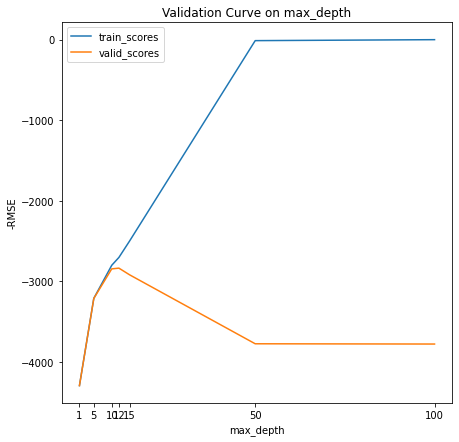

In [132]:
plot_validation_curve(train_scores, valid_scores, "max_depth", tuned_parameters[0]['max_depth'])

In [133]:
dtrModel = DecisionTreeRegressor(max_depth = 12)

dtrModel.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12)

In [138]:
y_train_result = dtrModel.predict(X_train)

In [139]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

RMSE of the training set: 2707.1710147557083


In [140]:
y_val_result = dtrModel.predict(X_val)

In [141]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 2823.136729879112


In [143]:
to_submission_file(dtrModel)

Exported Submission File


RMSE on Test set after Tuning 2 times: `3045.16427790146`

#### Random Forest Regression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [ ]:
kf = KFold(n_splits = 5, random_state = 7777, shuffle = True)
for train_index, val_index in kf.split(X,y):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

## Loop then we just take the last fold

In [ ]:
rfModel = RandomForestRegressor()

rfModel.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_train_result = rfModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

RMSE of the training set: 1022.2742678143604


In [ ]:
y_val_result = rfModel.predict(X_val)

In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

RMSE of the validation set: 2735.3644641288624


RMSE on Test set: `3051.29562235462	`

#### Gaussian Naive Bayes (Can't run ...)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5, random_state = 7777, shuffle = True)
for train_index, val_index in kf.split(X,y):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

## Loop then we just take the last fold

In [ ]:
gnbModel = GaussianNB()

gnbModel.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train_result = gnbModel.predict(X_train)

In [ ]:
print("RMSE of the training set:", end = " ")
print(myRMSE(y_train_result, y_train))

In [ ]:
y_val_result = gnbModel.predict(X_val)

In [ ]:
print("RMSE of the validation set:", end = " ")
print(myRMSE(y_val_result, y_val))

## Submission

### Predict on the testing set

In [ ]:
## Note: Change model name

y_test_pred = dtrModel.predict(test_encode)

In [ ]:
y_test_pred.shape , y_test_pred

((233599,), array([12071.52009156, 11565.57653061,  5997.48946693, ...,
        12604.44127373, 17120.21212121,  2097.72727273]))

In [ ]:
submission = pd.concat([pd.DataFrame(y_test_pred, columns=['Purchase']), df_test[['User_ID', 'Product_ID']]] , axis = 1)
submission.head()

,Purchase,User_ID,Product_ID
0,12071.520092,1000004,P00128942
1,11565.576531,1000009,P00113442
2,5997.489467,1000010,P00288442
3,2563.593525,1000010,P00145342
4,2597.481149,1000011,P00053842


In [ ]:
submission.to_csv('submission.csv', index=False)